# Mòdul 1
#### Introducció a NumPy
##### NumPy (Numerical Python) és una llibreria per a Python, escrita en Python C i C++, enfocada a treballar amb arrays i té funcions d'àlgebra lineal, transformades de fourier, matrius, etc.
D'entrada, Python té objectes 'llista' per treballar com es faria amb arrays, però són lents de processar. NumPy aporta objectes 'array', anomenats 'ndarray', i funcions de suport, que permeten treballar més ràpid que amb llistes (x50). Això es deu a com s'emmagatzemen els arreys, en un lloc continu de memòria ('locality') i també a una optimització per a les CPU modernes.
En l'àmbit de la ciència de dades es treballa molt amb arrays, ja que la velocitat i els recursos són molt rellevants.
#### Recordatori de les característiques del arrays
##### Els objectes són estructures de dades; en el cas dels arrays, consisteix en una taula/matriu de dades indexades. Segons la mida de l'array, es defineix el seu rang (rank, dimensions) i la forma (shape, la mida de cada dimensió, presentada coma tupla dimensió-mida).
#### Instal·lació de la llibreria NumPy
##### Des del terminal de Windows:
pip install numpy
##### O bé des del terminal de conda:
conda install numpy
##### Per utilitzar la llibreria en un codi Pyton:
import numpy as np

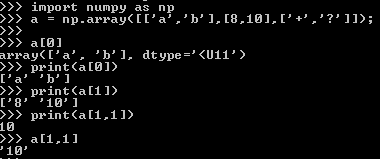
## Tasca 1 (M1 T01) Programació numèrica amb NumPy
### Exercici 1
##### Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [20]:
import numpy as np
import pandas as pd
def f11(a):
    dim = a.ndim # Es calcula la dimensió de l'array d'entrada
    if dim > 1:
        print('Array de dimensió > 1:',str(dim))
        return
    else:
        print('Ok, array de dimensió:',str(dim))
        a = pd.Series(a, dtype=float) # es converteix a un array de Pandas
        return a.describe() #càlcul del resum estadístic i output

##### Nota: S'aprofita el mètode 'describe' de la llibreria Pandas; per fer-ho cal convertir el NumPy-array a un array de Pandas, que en aquest cas és una Serie, ja que té una sola dimensió.
Utilitzo la funció sobre un parell d'arrays per provar-la:

In [21]:
a1 = np.array([[5,0.2,24,9],[4,0.5,26,8],[6,0.4,23,10]])
a2 = np.array([5,0.2,24,9,4,0.5,26,8,6,0.4,23,10])
print('Prova del primer array:')
f11(a1)
print('Prova del segon array:')
f11(a2)

Prova del primer array:
Array de dimensió > 1: 2
Prova del segon array:
Ok, array de dimensió: 1


count    12.000000
mean      9.675000
std       9.439677
min       0.200000
25%       3.125000
50%       7.000000
75%      13.250000
max      26.000000
dtype: float64

##### El primer és de dimensió 2, però el segon és correcte i se'n calculen els paràmetres estadístics bàsics.

### Exercici 2
##### Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [23]:
import numpy as np
def f12(n):
    # Es crea un Generator
    # default_rng is the recommended constructor for the random number class Generator
    # no es posa llavor pq l'agafi aleatòria
    rng = np.random.default_rng() 
    # Es generen N valors enters entre 0 i 100 per omplir la matriu n x n
    N = n*n
    rints = rng.integers(low=0, high=101, size=N)#high és exclusiu
    # Es dona forma a la matriu
    quadrat = np.reshape(rints,(n,n))
    return quadrat

##### Es prova la funció i es veu que s'obtenen valors entre 0 i 100, aleatoris i endreçats en la mida especificada.

In [24]:
f12(8)

array([[ 23, 100,  31,  31,  29,  82, 100,  53],
       [ 54,  98,  72,  11,  30,  25,  74,  71],
       [  5,  79,  46,  18,  41,  80,  99,  38],
       [  6,  90,  85,  63,  53,  68,  27,   4],
       [ 48,  61,  90,  95,  56,  57,  23,  57],
       [ 80,  87,  44,  58,  48,  73,  63,  91],
       [ 81,  18,  88,  95,  98,  75,  74,  48],
       [ 64,   0,  30,  59,  15,  47,  21,  99]], dtype=int64)

In [25]:
f12(4)

array([[33, 10, 25, 83],
       [21, 23, 22, 64],
       [91, 57, 47, 50],
       [15, 20, 97, 90]], dtype=int64)

In [26]:
f12(4)

array([[66, 55, 81,  7],
       [ 0, 63, 39, 52],
       [ 9, 72, 90, 40],
       [85, 34, 54, 88]], dtype=int64)

### Exercici 3
##### Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.

In [9]:
def f13(t):
    if t.ndim != 2:
        print('Error, la taula ha de ser de dimensió 2!')
        return
    else:
        F,C = t.shape #Es calcula el nombre de files i de columnes
        f = np.array([]) #Array que emmagatzemarà els totals de les files
        c = np.array([]) #Ídem per les columnes
        
        for i in range(F):
            f = np.append(f,np.sum(t[i,:]))
        for i in range(C):
            c = np.append(c,np.sum(t[:,i]))
        print('La taula entrada té ',F,' files i ',C,' columnes.\n Les sumes de les files són:\n',f,'\n i les de les columnes:\n',c)
    return

In [10]:
import numpy as np
t1 = np.array([[8.5,3,15,-4],[54,1.1,-10,0]])
print(t1)
f13(t1)

[[  8.5   3.   15.   -4. ]
 [ 54.    1.1 -10.    0. ]]
La taula entrada té  2  files i  4  columnes.
 Les sumes de les files són:
 [22.5 45.1] 
 i les de les columnes:
 [62.5  4.1  5.  -4. ]


### Exercici 4
##### Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.
#### Sobre el coeficient de correlació.
##### El coeficient de correlació mesura la relació entre dues variables. El seu valor pot osicil·lar entre 1 i -1: 1 implica una relació exacte, perfecte entre les dues variables, mentre que 0 implicaria que no hi ha cap relació en absolut; per altra banda, el signe indica el sentit d'aquesta relació, directe o invers, és a dir si creixen o decreixen alhora o inversament.
#### Definició d'una funció que calculi el coeficient de correlació

In [60]:
def corr_coef(x,y):
    import numpy as np
    #covariància de x,y
    cov = np.mean((x - np.mean(x))*(y - np.mean(y)).T)
    #desviacions típiques de x i de y
    sx = np.std(x)
    sy = np.std(y)
    #coeficient de correlació
    corr = cov/(sx*sy)
    return corr

In [61]:
import numpy as np
x = np.random.randint(1,30,size=5)
y = np.random.randint(1,30,size=5)
print("x: ",x,"; y: ", y,"\nEl coeficient de correlació calculat és:\n")
corr_coef(x,y)

x:  [25  4  4  5 14] ; y:  [ 8 27 19 10 25] 
El coeficient de correlació calculat és:



-0.4491131080400371

##### Es pot comparar amb la funció pròpia de NumPy que calcula el mateix coeficient:

In [62]:
np.corrcoef(x,y)

array([[ 1.        , -0.44911311],
       [-0.44911311,  1.        ]])